# Informe para validar los datos de los diferentes vuelos (cruzado, longitudinal, transversal) con diferentes correcciones radiométricas.

In [73]:
import pandas as pd
import geopandas as gpd
import os
from rasterstats import zonal_stats
import matplotlib.pyplot as plt


### Cargar rutas de archivos

In [47]:
#CARGAR CANALES DEL VUELO CRUZADO
    #Cargar canales vuelo cruzado con las correcciones radiométricas de la cámara sólamente (OKAY)
path_cruzado_CO = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_only/indices/"
tiff_cruzado_CO_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_only/indices/blue/Santaella_20220421_cruzado_index_blue.tif"
tiff_cruzado_CO_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_only/indices/green/Santaella_20220421_cruzado_index_green.tif"
tiff_cruzado_CO_RED= "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_only/indices/red/Santaella_20220421_cruzado_index_red.tif"
tiff_cruzado_CO_REDEDGE= "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_only/indices/red_edge/Santaella_20220421_cruzado_index_red_edge.tif"
tiff_cruzado_CO_NIR= "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_only/indices/nir/Santaella_20220421_cruzado_index_nir.tif"
tiff_cruzado_CO = [tiff_cruzado_CO_BLUE, tiff_cruzado_CO_GREEN, tiff_cruzado_CO_RED, tiff_cruzado_CO_REDEDGE, tiff_cruzado_CO_NIR]
    #Cargar canales vuelo cruzado con las correcciones radiométricas de la cámara y irradiancia del sol
path_cruzado_CASI = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_and_SunIrradiance/indices/"
tiff_cruzado_CASI_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_and_SunIrradiance/indices/blue/Santaella_20220421_cruzado_index_blue.tif"
tiff_cruzado_CASI_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_and_SunIrradiance/indices/green/Santaella_20220421_cruzado_index_green.tif"
tiff_cruzado_CASI_RED= "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_and_SunIrradiance/indices/red/Santaella_20220421_cruzado_index_red.tif"
tiff_cruzado_CASI_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_and_SunIrradiance/indices/red_edge/Santaella_20220421_cruzado_index_red_edge.tif"
tiff_cruzado_CASI_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_and_SunIrradiance/indices/nir/Santaella_20220421_cruzado_index_nir.tif"
tiff_cruzado_CASI = [tiff_cruzado_CASI_BLUE, tiff_cruzado_CASI_GREEN, tiff_cruzado_CASI_RED, tiff_cruzado_CASI_REDEDGE, tiff_cruzado_CASI_NIR]
    #Cargar canales vuelo cruzado con las correcciones radiométricas de la cámara, irradiancia del sol y ángulo solar
path_cruzado_CASIASA = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/"
tiff_cruzado_CASIASA_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/blue/Santaella_20220421_cruzado_index_blue.tif"
tiff_cruzado_CASIASA_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/green/Santaella_20220421_cruzado_index_green.tif"
tiff_cruzado_CASIASA_RED = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/red/Santaella_20220421_cruzado_index_red.tif"
tiff_cruzado_CASIASA_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/red_edge/Santaella_20220421_cruzado_index_red_edge.tif"
tiff_cruzado_CASIASA_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_vuelo_dos_pasadas/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/nir/Santaella_20220421_cruzado_index_nir.tif"
tiff_cruzado_CASIASA = [tiff_cruzado_CASIASA_BLUE, tiff_cruzado_CASIASA_GREEN, tiff_cruzado_CASIASA_RED, tiff_cruzado_CASIASA_REDEDGE, tiff_cruzado_CASIASA_NIR]
path_cruzado = [path_cruzado_CO, path_cruzado_CASI, path_cruzado_CASIASA]

#CARGAR CANALES DEL VUELO LONGITUDINAL
    #Cargar canales vuelo longitudinal con las correcciones radiométricas de la cámara sólamente
path_longitudinal_CO = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_only/indices/"
tiff_longitudinal_CO_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_only/indices/blue/Santaella_20222104_longitudinal_MX_2_index_blue.tif"
tiff_longitudinal_CO_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_only/indices/green/Santaella_20222104_longitudinal_MX_2_index_green.tif"
tiff_longitudinal_CO_RED = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_only/indices/red/Santaella_20222104_longitudinal_MX_2_index_red.tif"
tiff_longitudinal_CO_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_only/indices/red_edge/Santaella_20222104_longitudinal_MX_2_index_red_edge.tif"
tiff_longitudinal_CO_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_only/indices/nir/Santaella_20222104_longitudinal_MX_2_index_nir.tif"
tiff_longitudinal_CO = [tiff_longitudinal_CO_BLUE, tiff_longitudinal_CO_GREEN, tiff_longitudinal_CO_RED, tiff_longitudinal_CO_REDEDGE, tiff_longitudinal_CO_NIR]
    #Cargar canales vuelo longitudinal con las correcciones radiométricas de la cámara y irradiancia del sol
path_longitudinal_CASI = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_and_SunIrradiance/indices/"
tiff_longitudinal_CASI_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_and_SunIrradiance/indices/blue/Santaella_20222104_longitudinal_MX_2_index_blue.tif"
tiff_longitudinal_CASI_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_and_SunIrradiance/indices/green/Santaella_20222104_longitudinal_MX_2_index_green.tif"
tiff_longitudinal_CASI_RED = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_and_SunIrradiance/indices/red/Santaella_20222104_longitudinal_MX_2_index_red.tif"
tiff_longitudinal_CASI_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_and_SunIrradiance/indices/red_edge/Santaella_20222104_longitudinal_MX_2_index_red_edge.tif"
tiff_longitudinal_CASI_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_and_SunIrradiance/indices/nir/Santaella_20222104_longitudinal_MX_2_index_nir.tif"
tiff_longitudinal_CASI = [tiff_longitudinal_CASI_BLUE, tiff_longitudinal_CASI_GREEN, tiff_longitudinal_CASI_RED, tiff_longitudinal_CASI_REDEDGE, tiff_longitudinal_CASI_NIR]
    #Cargar canales vuelo longitudinal con las correcciones radiométricas de la cámara, irradiancia del sol y ángulo solar
path_longitudinal_CASIASA = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/"
tiff_longitudinal_CASIASA_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/blue/Santaella_20222104_longitudinal_MX_2_index_blue.tif"
tiff_longitudinal_CASIASA_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/green/Santaella_20222104_longitudinal_MX_2_index_green.tif"
tiff_longitudinal_CASIASA_RED = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/red/Santaella_20222104_longitudinal_MX_2_index_red.tif"
tiff_longitudinal_CASIASA_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/red_edge/Santaella_20222104_longitudinal_MX_2_index_red_edge.tif"
tiff_longitudinal_CASIASA_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_longitudinal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/nir/Santaella_20222104_longitudinal_MX_2_index_nir.tif"
tiff_longitudinal_CASIASA = [tiff_longitudinal_CASIASA_BLUE, tiff_longitudinal_CASIASA_GREEN, tiff_longitudinal_CASIASA_RED, tiff_longitudinal_CASIASA_REDEDGE, tiff_longitudinal_CASIASA_NIR]
path_longitudinal = [path_longitudinal_CO, path_longitudinal_CASI, path_longitudinal_CASIASA]


#CARGAR CANALES DEL VUELO TRANSVERSAL
    #Cargar canales vuelo longitudinal con las correcciones radiométricas de la cámara sólamente
path_transversal_CO = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_only/indices/"
tiff_transversal_CO_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_only/indices/blue/Santaella_20222104_transversal_MX_2_index_blue.tif"
tiff_transversal_CO_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_only/indices/green/Santaella_20222104_transversal_MX_2_index_green.tif"
tiff_transversal_CO_RED = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_only/indices/red/Santaella_20222104_transversal_MX_2_index_red.tif"
tiff_transversal_CO_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_only/indices/red_edge/Santaella_20222104_transversal_MX_2_index_red_edge.tif"
tiff_transversal_CO_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_only/indices/nir/Santaella_20222104_transversal_MX_2_index_nir.tif"
tiff_transversal_CO = [tiff_transversal_CO_BLUE, tiff_transversal_CO_GREEN, tiff_transversal_CO_RED, tiff_transversal_CO_REDEDGE, tiff_transversal_CO_NIR]
    #Cargar canales vuelo longitudinal con las correcciones radiométricas de la cámara y irradiancia del sol
path_transversal_CASI = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_and_SunIrradiance/indices/"
tiff_transversal_CASI_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_and_SunIrradiance/indices/blue/Santaella_20222104_transversal_MX_2_index_blue.tif"
tiff_transversal_CASI_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_and_SunIrradiance/indices/green/Santaella_20222104_transversal_MX_2_index_green.tif"
tiff_transversal_CASI_RED = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_and_SunIrradiance/indices/red/Santaella_20222104_transversal_MX_2_index_red.tif"
tiff_transversal_CASI_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_and_SunIrradiance/indices/red_edge/Santaella_20222104_transversal_MX_2_index_red_edge.tif"
tiff_transversal_CASI_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_and_SunIrradiance/indices/nir/Santaella_20222104_transversal_MX_2_index_nir.tif"
tiff_transversal_CASI = [tiff_transversal_CASI_BLUE, tiff_transversal_CASI_GREEN, tiff_transversal_CASI_RED, tiff_transversal_CASI_REDEDGE, tiff_transversal_CASI_NIR]
    #Cargar canales vuelo longitudinal con las correcciones radiométricas de la cámara, irradiancia del sol y ángulo solar
path_transversal_CASIASA = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/"
tiff_transversal_CASIASA_BLUE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/blue/Santaella_20222104_transversal_MX_2_index_blue.tif"
tiff_transversal_CASIASA_GREEN = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/green/Santaella_20222104_transversal_MX_2_index_green.tif"
tiff_transversal_CASIASA_RED = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/red/Santaella_20222104_transversal_MX_2_index_red.tif"
tiff_transversal_CASIASA_REDEDGE = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/red_edge/Santaella_20222104_transversal_MX_2_index_red_edge.tif"
tiff_transversal_CASIASA_NIR = "Z:/11-Projects/CERESTRES/05-pix4d/Santaella_20220421_MX/indices_analisis_SBJ/indices_transversal/Camera_SunIrradiance_SunAngle_using_DLS_IMU/indices/nir/Santaella_20222104_transversal_MX_2_index_nir.tif"
tiff_transversal_CASIASA = [tiff_transversal_CASIASA_BLUE, tiff_transversal_CASIASA_GREEN, tiff_transversal_CASIASA_RED, tiff_transversal_CASIASA_REDEDGE, tiff_transversal_CASIASA_NIR]
path_transversal = [path_transversal_CO, path_transversal_CASI, path_transversal_CASIASA]


In [93]:
#Load geometry of all plots (Riego + Secano)
geometry_riego = gpd.read_file('Z:/11-Projects/CERESTRES/02-ensayo/Santaella/Shapefiles/00-raw/riego/plots_regadio.shp')
geometry_riego['tipo'] = 'riego'
geometry_secano = gpd.read_file('Z:/11-Projects/CERESTRES/02-ensayo/Santaella/Shapefiles/00-raw/secano/plots_secano.shp')
geometry_secano['tipo'] = 'secano'
geometry_total = pd.concat([geometry_riego, geometry_secano])

#Load geometry of plots with SVC measures
measures_SVC = pd.read_csv('Z:/11-Projects/CERESTRES/04-Raw/SVC_HR1024i/Santaella/2022_04_22/df_stats_calibration_SVC_and_MX.csv')
#Calculate index NDVI, NDRE, GNDVI
measures_SVC['NDVI_SVC'] = (measures_SVC['CH_infrared_SVC'] - measures_SVC['CH_red_SVC'])/(measures_SVC['CH_infrared_SVC'] + measures_SVC['CH_red_SVC'])
measures_SVC['GNDVI_SVC'] = (measures_SVC['CH_infrared_SVC'] - measures_SVC['CH_green_SVC'])/(measures_SVC['CH_infrared_SVC'] + measures_SVC['CH_green_SVC'])
measures_SVC['NDRE_SVC'] = (measures_SVC['CH_infrared_SVC'] - measures_SVC['CH_redEdge_SVC'])/(measures_SVC['CH_infrared_SVC'] + measures_SVC['CH_redEdge_SVC'])

## Calculate zonal stats

In [51]:
stats_computed = 'mean max min median std'

In [87]:
#CALCULAR ESTADÍSTICAS ZONALES EN CADA VUELO Y CADA CORRECCIÓN RADIOMÉTRICA
#CALCULAR VUELO CRUZADO
    #Cargar canales vuelo CRUZADO con las correcciones radiométricas de la cámara sólamente (path_cruzado_CO)
df_cruzado_CO_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CO[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_cruzado_CO_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CO[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_cruzado_CO_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CO[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_cruzado_CO_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CO[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_cruzado_CO_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CO[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_cruzado_CO = geometry_total.join(df_cruzado_CO_BLUE).join(df_cruzado_CO_GREEN).join(df_cruzado_CO_RED).join(df_cruzado_CO_REDEDGE).join(df_cruzado_CO_NIR)
    #Cargar canales vuelo CRUZADO con las correcciones radiométricas de la cámara y irradiancia del sol
df_cruzado_CASI_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASI[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_cruzado_CASI_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASI[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_cruzado_CASI_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASI[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_cruzado_CASI_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASI[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_cruzado_CASI_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASI[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_cruzado_CASI = geometry_total.join(df_cruzado_CASI_BLUE).join(df_cruzado_CASI_GREEN).join(df_cruzado_CASI_RED).join(df_cruzado_CASI_REDEDGE).join(df_cruzado_CASI_NIR)
    #Cargar canales vuelo CRUZADO con las correcciones radiométricas de la cámara, irradiancia del sol y ángulo solar
df_cruzado_CASIASA_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASIASA[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_cruzado_CASIASA_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASIASA[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_cruzado_CASIASA_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASIASA[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_cruzado_CASIASA_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASIASA[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_cruzado_CASIASA_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_cruzado_CASIASA[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_cruzado_CASIASA = geometry_total.join(df_cruzado_CASIASA_BLUE).join(df_cruzado_CASIASA_GREEN).join(df_cruzado_CASIASA_RED).join(df_cruzado_CASIASA_REDEDGE).join(df_cruzado_CASIASA_NIR)

#CALCULAR VUELO LONGITUDINAL
    #Cargar canales vuelo LONGITUDINAL con las correcciones radiométricas de la cámara sólamente
df_longitudinal_CO_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CO[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_longitudinal_CO_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CO[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_longitudinal_CO_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CO[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_longitudinal_CO_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CO[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_longitudinal_CO_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CO[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_longitudinal_CO = geometry_total.join(df_longitudinal_CO_BLUE).join(df_longitudinal_CO_GREEN).join(df_longitudinal_CO_RED).join(df_longitudinal_CO_REDEDGE).join(df_longitudinal_CO_NIR)
    #Cargar canales vuelo LONGITUDINAL con las correcciones radiométricas de la cámara y irradiancia del sol
df_longitudinal_CASI_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASI[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_longitudinal_CASI_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASI[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_longitudinal_CASI_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASI[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_longitudinal_CASI_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASI[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_longitudinal_CASI_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASI[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_longitudinal_CASI = geometry_total.join(df_longitudinal_CASI_BLUE).join(df_longitudinal_CASI_GREEN).join(df_longitudinal_CASI_RED).join(df_longitudinal_CASI_REDEDGE).join(df_longitudinal_CASI_NIR)
    #Cargar canales vuelo LONGITUDINAL con las correcciones radiométricas de la cámara, irradiancia del sol y ángulo solar
df_longitudinal_CASIASA_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASIASA[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_longitudinal_CASIASA_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASIASA[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_longitudinal_CASIASA_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASIASA[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_longitudinal_CASIASA_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASIASA[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_longitudinal_CASIASA_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_longitudinal_CASIASA[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_longitudinal_CASIASA = geometry_total.join(df_longitudinal_CASIASA_BLUE).join(df_longitudinal_CASIASA_GREEN).join(df_longitudinal_CASIASA_RED).join(df_longitudinal_CASIASA_REDEDGE).join(df_longitudinal_CASIASA_NIR)

#CALCULAR VUELO TRANSVERSAL
    #Cargar canales vuelo TRANSVERSAL con las correcciones radiométricas de la cámara sólamente
df_transversal_CO_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CO[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_transversall_CO_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CO[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_transversal_CO_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CO[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_transversal_CO_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CO[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_transversal_CO_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CO[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_transversal_CO = geometry_total.join(df_transversal_CO_BLUE).join(df_transversall_CO_GREEN).join(df_transversal_CO_RED).join(df_transversal_CO_REDEDGE).join(df_transversal_CO_NIR)
    #Cargar canales vuelo TRANSVERSAL con las correcciones radiométricas de la cámara y irradiancia del sol
df_transversal_CASI_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASI[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_transversall_CASI_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASI[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_transversal_CASI_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASI[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_transversal_CASI_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASI[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_transversal_CASI_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASI[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_transversal_CASI = geometry_total.join(df_transversal_CASI_BLUE).join(df_transversall_CASI_GREEN).join(df_transversal_CASI_RED).join(df_transversal_CASI_REDEDGE).join(df_transversal_CASI_NIR)
    #Cargar canales vuelo TRANSVERSAL con las correcciones radiométricas de la cámara, irradiancia del sol y ángulo solar
df_transversal_CASIASA_BLUE = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASIASA[0], stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_transversall_CASIASA_GREEN = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASIASA[1], stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_transversal_CASIASA_RED = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASIASA[2], stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_transversal_CASIASA_REDEDGE = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASIASA[3], stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_transversal_CASIASA_NIR = pd.DataFrame(zonal_stats(geometry_total, tiff_transversal_CASIASA[4], stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})
df_transversal_CASIASA= geometry_total.join(df_transversal_CASIASA_BLUE).join(df_transversall_CASIASA_GREEN).join(df_transversal_CASIASA_RED).join(df_transversal_CASIASA_REDEDGE).join(df_transversal_CASIASA_NIR)


In [88]:
print(df_cruzado_CO.index)
print(df_cruzado_CASI.index)

Int64Index([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,
            ...
            134, 135, 136, 137, 138, 139, 140, 141, 142, 143],
           dtype='int64', length=279)
Int64Index([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,
            ...
            134, 135, 136, 137, 138, 139, 140, 141, 142, 143],
           dtype='int64', length=279)


# GRÁFICAS - COMPARACIÓN SÓLO ENTRE VUELOS Y SVC MEDIDAS

### Comparar original (BERNI) con el que yo proceso (CRUZADO CASI)

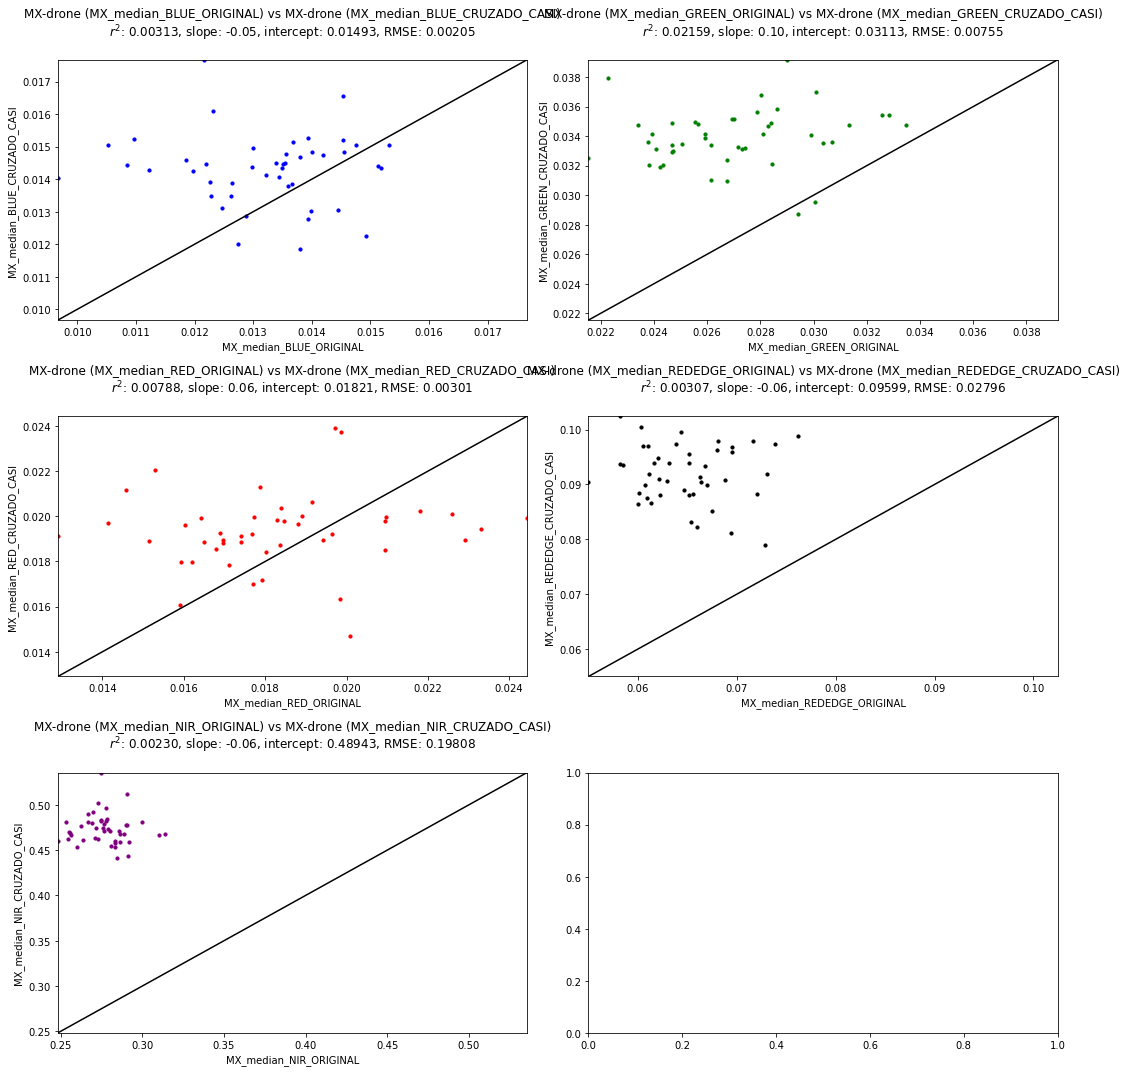

In [190]:
path = "Z:/11-Projects/CERESTRES/04-Raw/SVC_HR1024i/Santaella/2022_04_22/df_stats_calibration_SVC_and_MX.csv"
df_stats_ORIGINAL = pd.read_csv(path)

#Unir ambos dataframe
df_stats = pd.merge(df_stats_ORIGINAL.loc[df_stats_ORIGINAL['tipo']=='secano'].set_index('id'), df_cruzado_CASI.loc[df_cruzado_CASI['tipo']=='secano'].set_index('id'), left_index=True, right_index=True, suffixes=('_ORIGINAL','_CRUZADO_CASI'))
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE_ORIGINAL', 'MX_median_BLUE_CRUZADO_CASI',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('MX_median_GREEN_ORIGINAL', 'MX_median_GREEN_CRUZADO_CASI',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('MX_median_RED_ORIGINAL', 'MX_median_RED_CRUZADO_CASI',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('MX_median_REDEDGE_ORIGINAL', 'MX_median_REDEDGE_CRUZADO_CASI',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('MX_median_NIR_ORIGINAL', 'MX_median_NIR_CRUZADO_CASI',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

In [170]:
#Separar riego de secano para poder unir los atributos por ids
lista_columnas = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,53,54,55,56,57,58,59,60]
measures_SVC_secano = measures_SVC.loc[measures_SVC['tipo']=='secano'][measures_SVC.columns[lista_columnas]].set_index('id')
measures_SVC_riego = measures_SVC.loc[measures_SVC['tipo']=='riego'][measures_SVC.columns[lista_columnas]].set_index('id')

In [173]:
measures_SVC_secano.columns

Index(['file_name', 'index', 'file_path', 'instrument_type',
       'integration_time', 'measurement_type', 'gps_time_ref', 'gps_time_tgt',
       'longitude_ref', 'longitude_tgt', 'latitude_ref', 'latitude_tgt',
       'error_ref', 'error_tgt', 'wavelength_min', 'wavelength_max', 'filas',
       'columnas', 'tipo', 'fila_plantilla', 'columna_plantilla', 'id_josefin',
       'tipo_plantilla', 'repeticion', 'numero_variedad', 'nombre_variedad',
       'geometry', 'CH_blue_SVC', 'CH_green_SVC', 'CH_red_SVC',
       'CH_redEdge_SVC', 'CH_infrared_SVC', 'NDVI_SVC', 'GNDVI_SVC',
       'NDRE_SVC'],
      dtype='object')

## 1. Cruzado -CASI --> SECANO

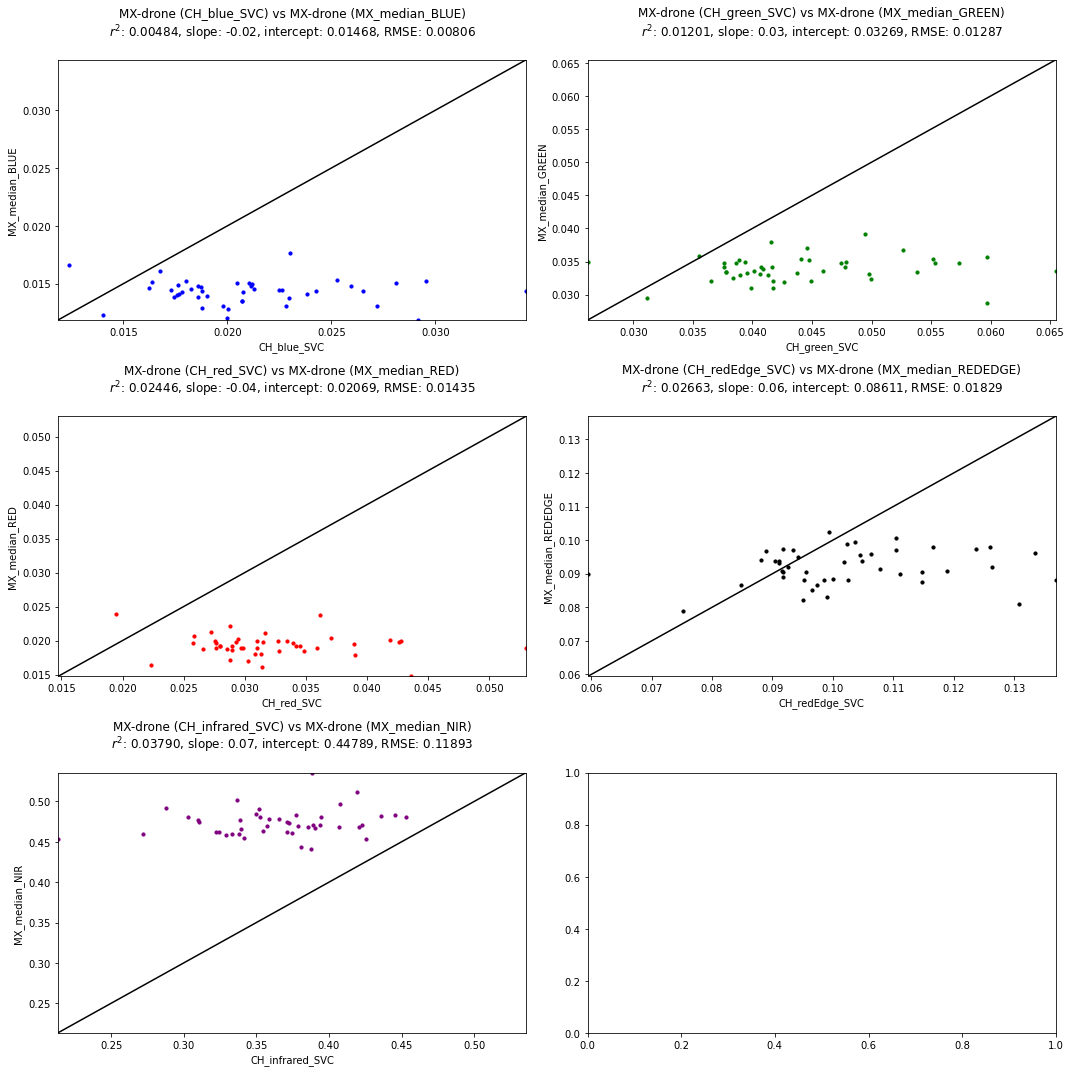

In [174]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_secano, df_cruzado_CASI.loc[df_cruzado_CASI['tipo']=='secano'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## 1.1 Cruzado - CO -- secano

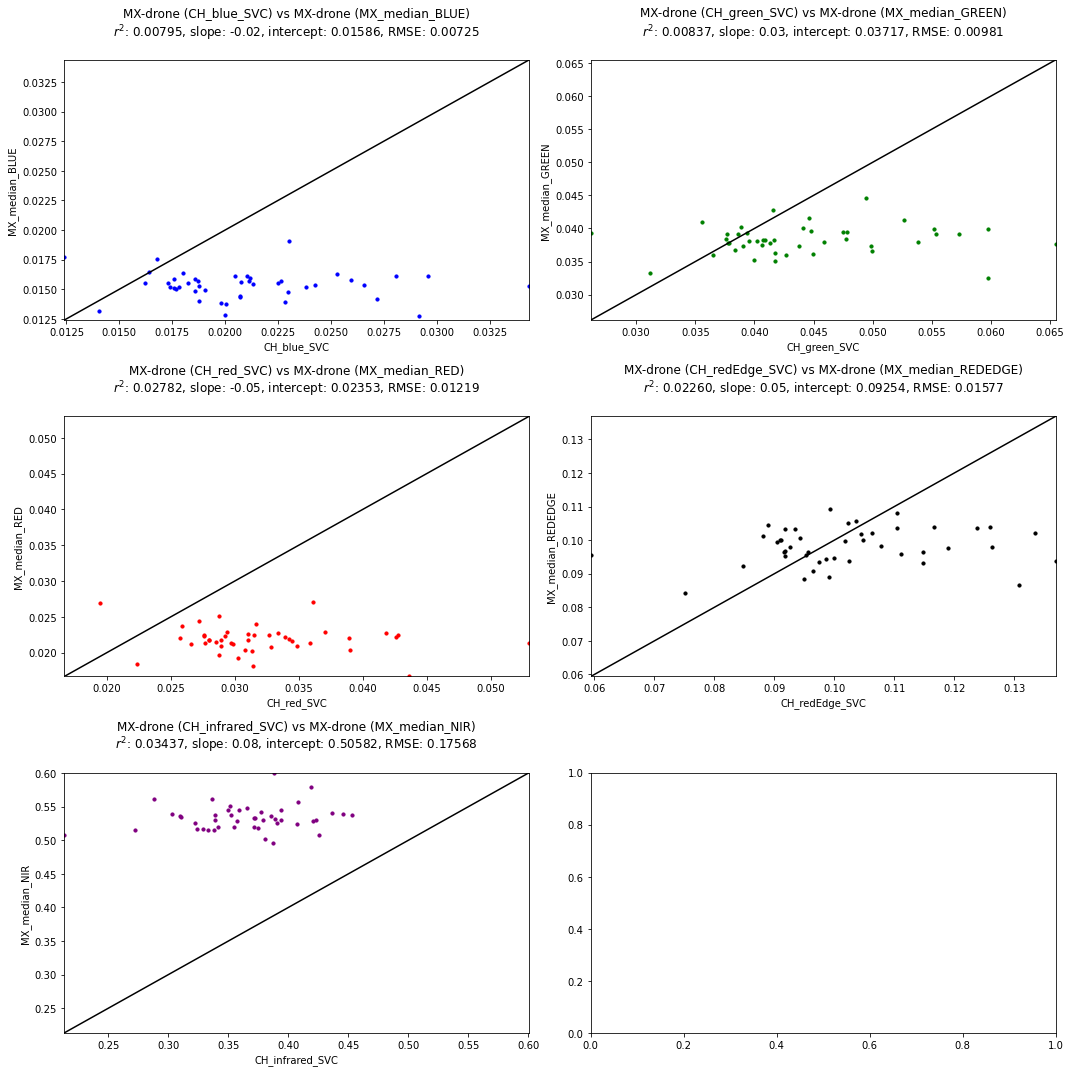

In [182]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_secano, df_cruzado_CO.loc[df_cruzado_CO['tipo']=='secano'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## 1.2 Cruzado - CASIASA --> SECANO

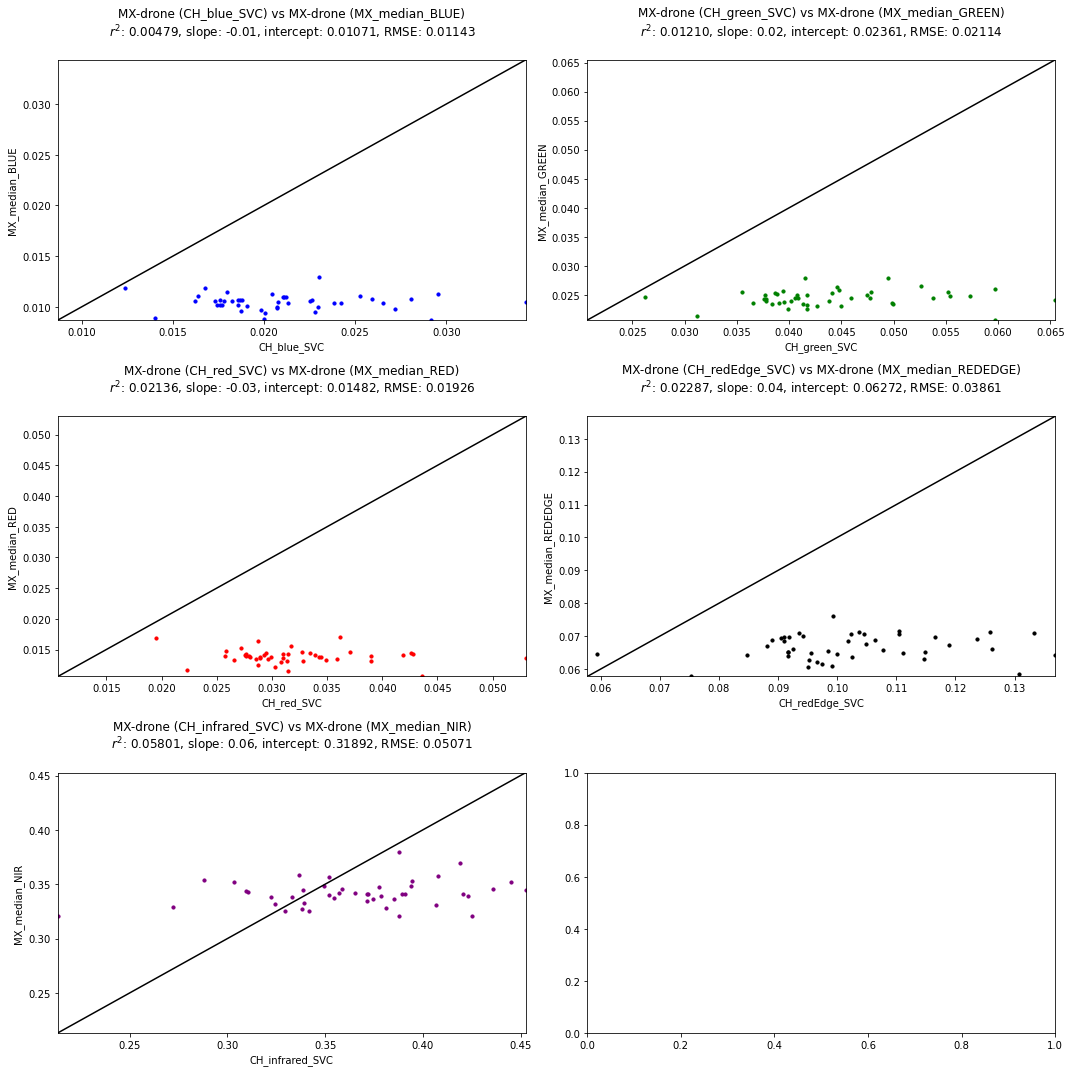

In [184]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_secano, df_cruzado_CASIASA.loc[df_cruzado_CASIASA['tipo']=='secano'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## 2. Cruzado -CASI --> RIEGO

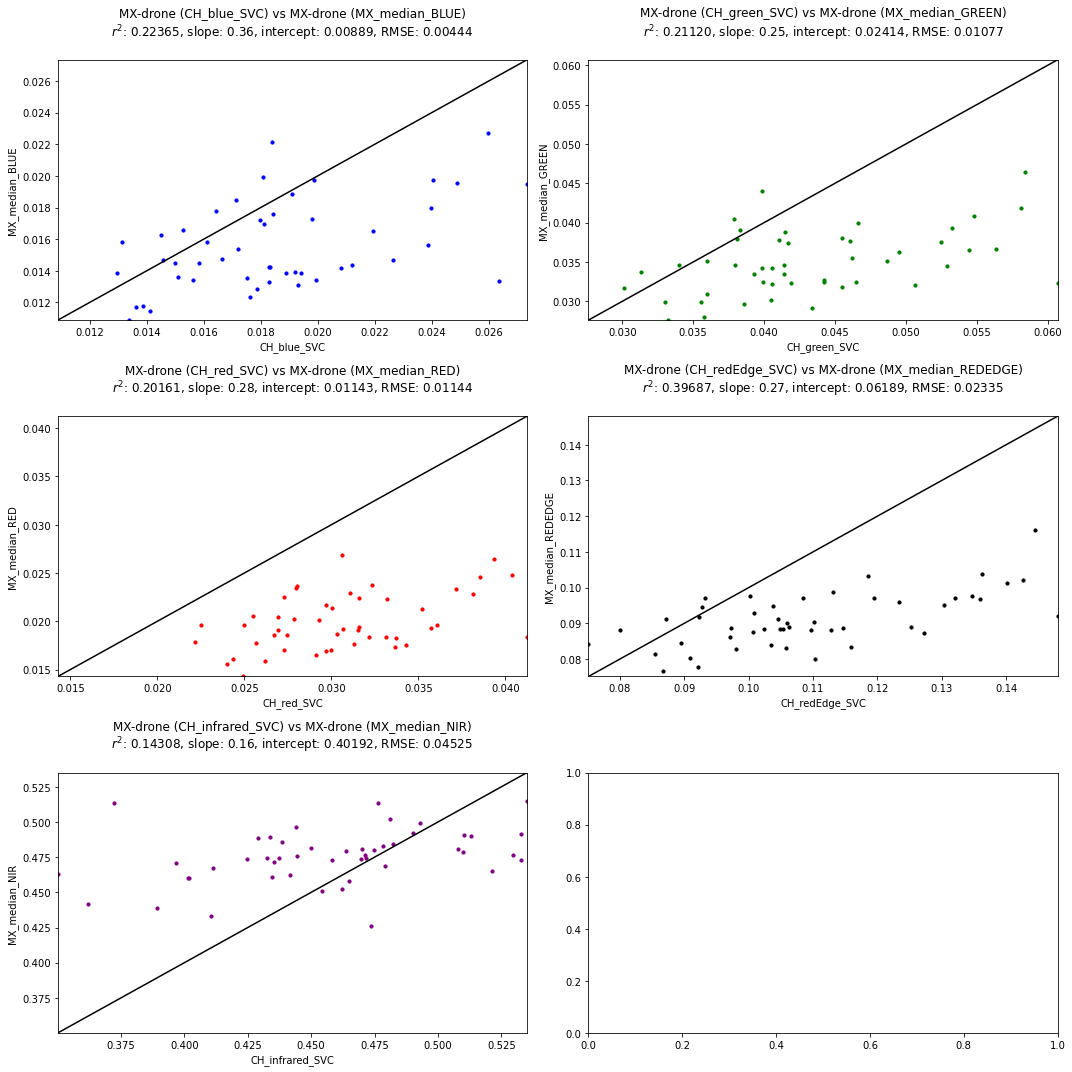

In [175]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_riego, df_cruzado_CASI.loc[df_cruzado_CASI['tipo']=='riego'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## Longitudinal (CASI) -- SECANO

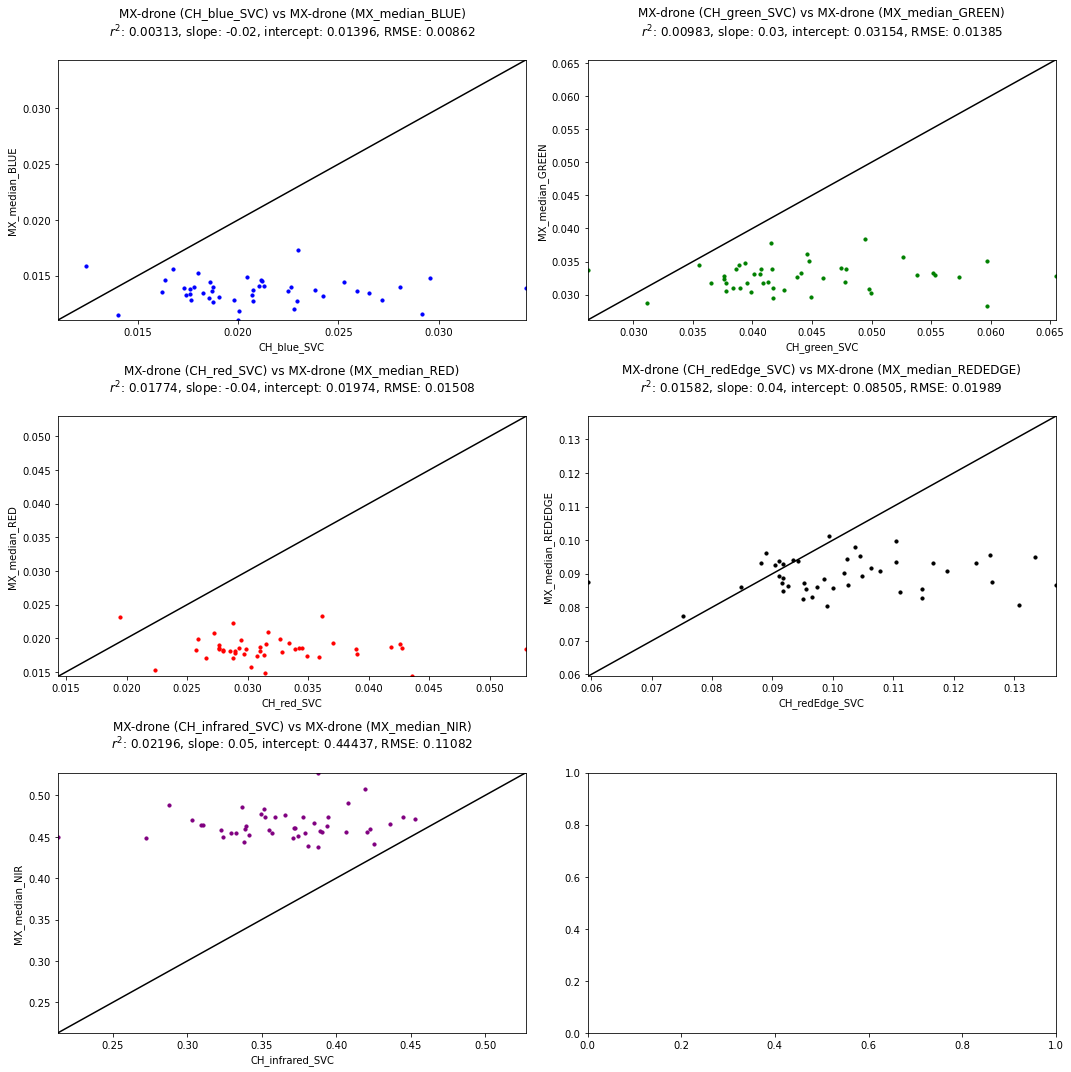

In [177]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_secano, df_longitudinal_CASI.loc[df_longitudinal_CASI['tipo']=='secano'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## Longitudinal (CASIASA) -- SECANO



In [ ]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_secano, df_longitudinal_CASI.loc[df_longitudinal_CASI['tipo']=='secano'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## Longitudinal (CASI) -- RIEGO

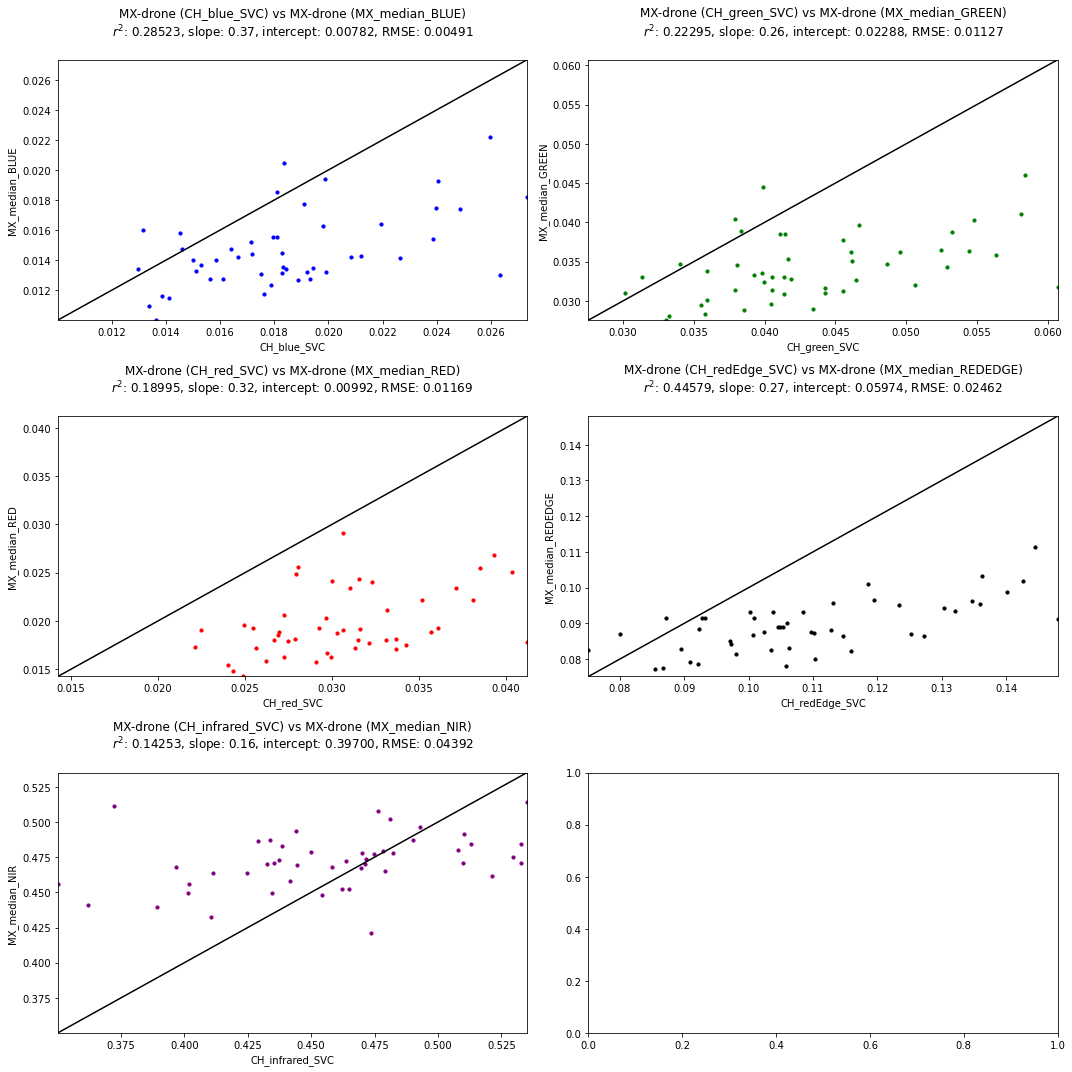

In [178]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_riego, df_longitudinal_CASI.loc[df_longitudinal_CASI['tipo']=='riego'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## Transversal (CASI) -- SECANO

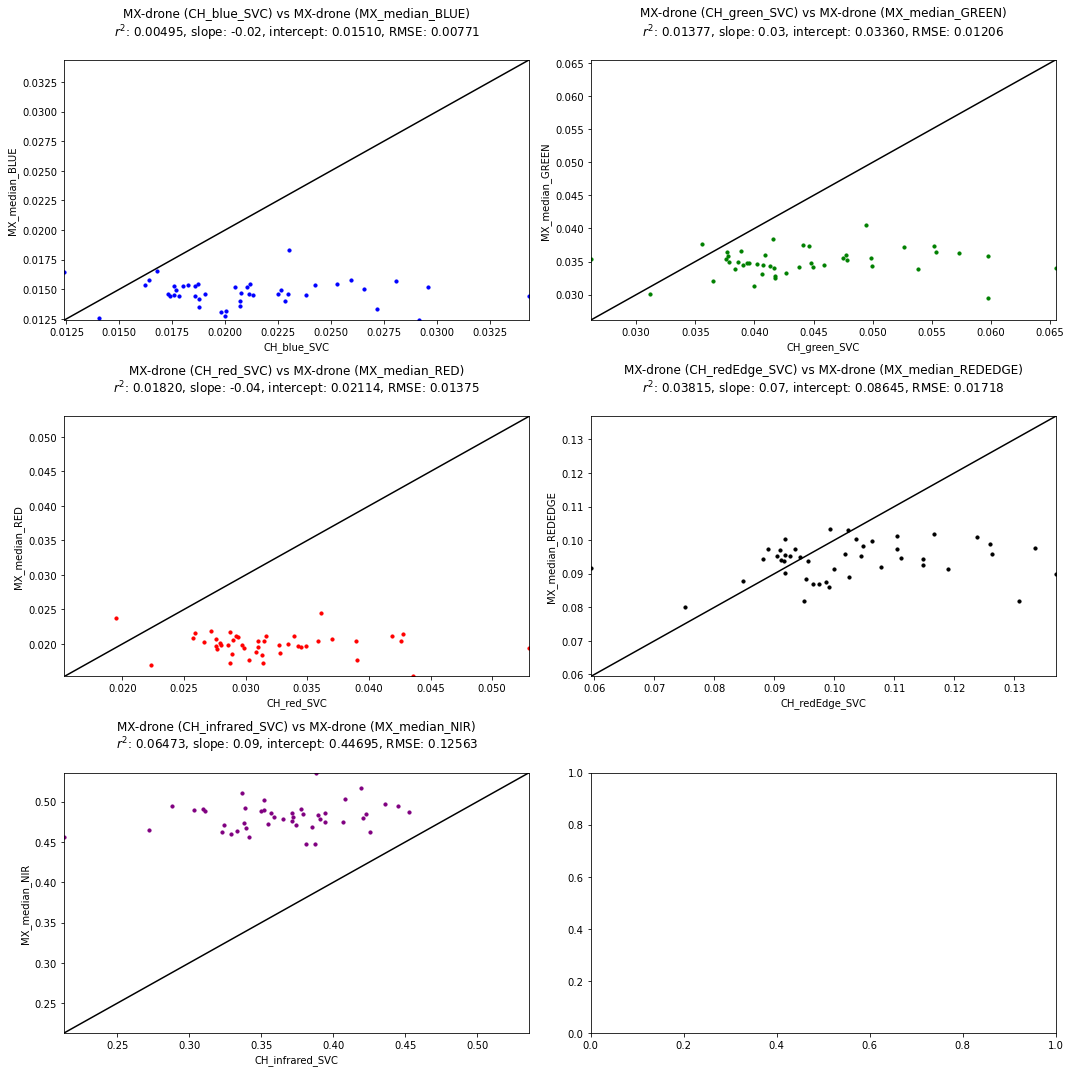

In [179]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_secano, df_transversal_CASI.loc[df_transversal_CASI['tipo']=='secano'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

## Transversal (CASI) -- RIEGO

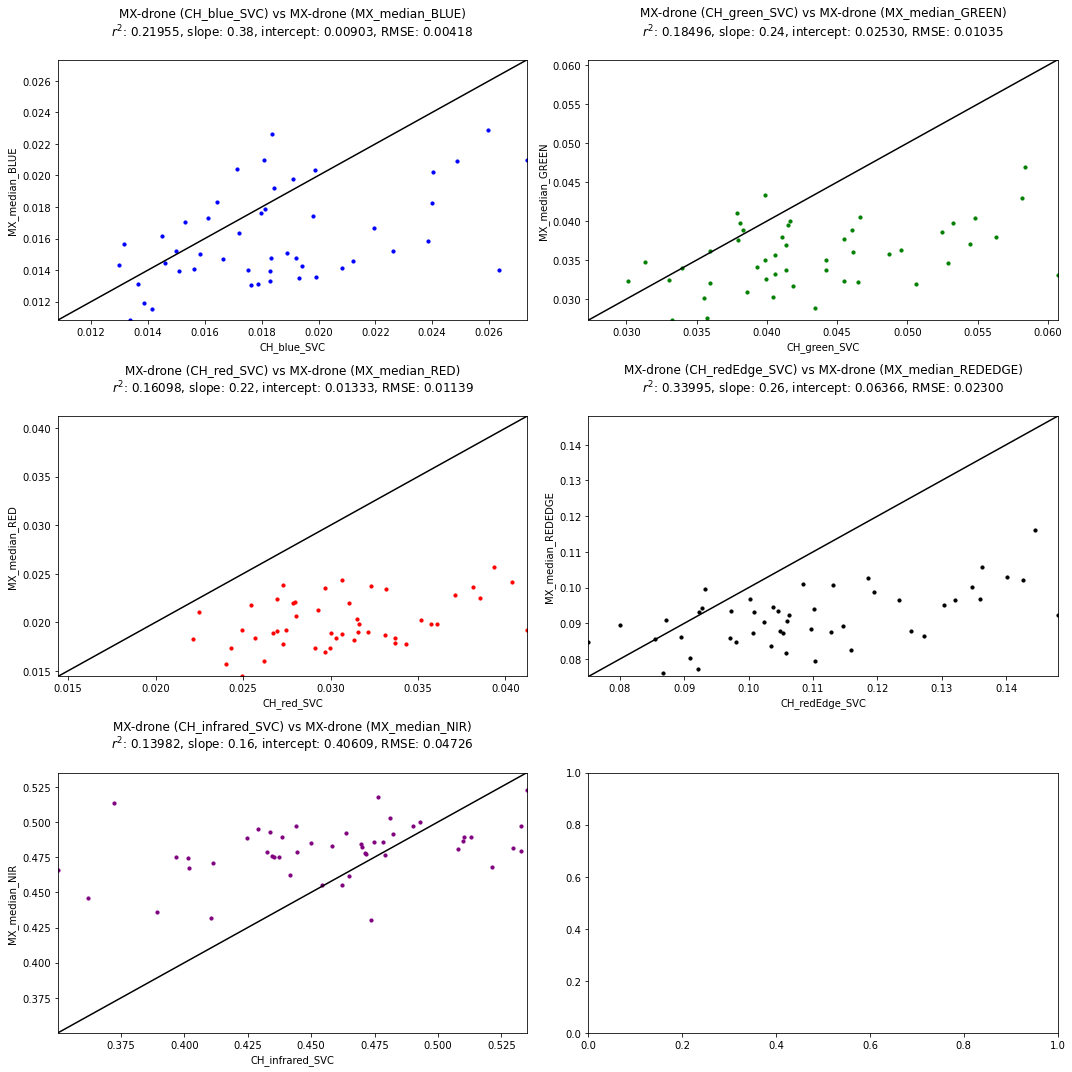

In [180]:
#Unir ambos dataframe
df_stats = pd.merge(measures_SVC_riego, df_transversal_CASI.loc[df_transversal_CASI['tipo']=='riego'].set_index('id'), left_index=True, right_index=True)
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('CH_blue_SVC', 'MX_median_BLUE',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('CH_green_SVC', 'MX_median_GREEN',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('CH_red_SVC', 'MX_median_RED',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('CH_redEdge_SVC', 'MX_median_REDEDGE',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('CH_infrared_SVC', 'MX_median_NIR',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

# GRÁFICAS - COMPARACIÓN SÓLO ENTRE VUELOS (CRUZADO, LONGITUDINAL Y TRANSVERSAL), ADEMÁS DE CORRECCIONES RADIOMÉTRICAS

In [70]:
from scipy import stats
def RMSE(df, p, x):
    return ((df[p] - df[x]) ** 2).mean() ** .5
    
def lregress(df, p, x):
    subset = df.dropna(subset=[p,x])
    slope, intercept, r_value, p_value, std_err = stats.linregress(subset[x], subset[p])
    return(slope, intercept, r_value*r_value, p_value, std_err)

def validation_plot(x, y, data, title=None, x_label=None, y_label=None, alpha=.5, c=None, cmap='jet', ax=None, size=40):
    slope, intercept, r2, p_value, std_err = lregress(data, y, x)
    rmse = RMSE(data, y, x)
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    if c is None:
        data.plot.scatter(x=x, y=y, marker='.', alpha=alpha, ax=ax, s=size)
    else:
        data.plot.scatter(x=x, y=y, marker='.', alpha=alpha, c=c, cmap=cmap, ax=ax, s=size)
    min_val = min(data[x].min(), data[y].min())
    max_val = max(data[x].max(), data[y].max())
    ax.plot([min_val,max_val], [min_val,max_val], c='black')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    val_text = "$r^2$: {r2:.5f}, slope: {slope:.2f}, intercept: {intercept:.5f}, RMSE: {rmse:.5f}".format(r2=r2, slope=slope, intercept=intercept, rmse=rmse)
    if title is None:
        ax.set_title("MX-drone ({x}) vs MX-drone ({y})\n{val}\n".format(x=x, y=y, val=val_text))
    else:
        ax.set_title(title)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

In [ ]:
df_stats = pd.merge(df_cruzado_CO, df_cruzado_CASI, left_index=True, right_index=True, suffixes=('_CO','_CASI'))
df_stats

### VUELO CRUZADO

#### 1. Vuelo Cruzado Camera Only VS Vuelo Cruzado Camera and Solar Irradiation

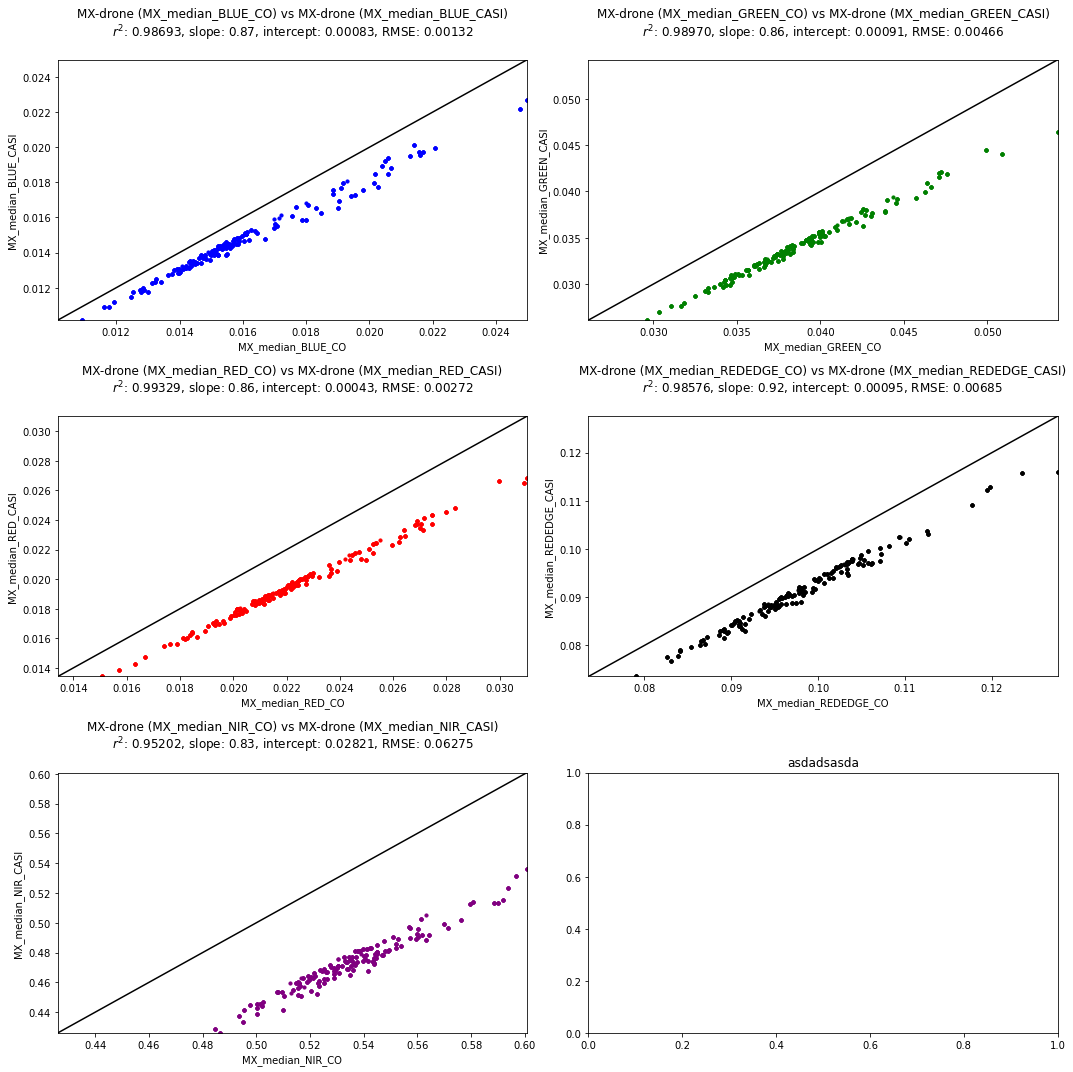

In [81]:
#Unir ambos dataframe
df_stats = pd.merge(df_cruzado_CO, df_cruzado_CASI, left_index=True, right_index=True, suffixes=('_CO','_CASI'))
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE_CO', 'MX_median_BLUE_CASI',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('MX_median_GREEN_CO', 'MX_median_GREEN_CASI',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('MX_median_RED_CO', 'MX_median_RED_CASI',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('MX_median_REDEDGE_CO', 'MX_median_REDEDGE_CASI',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('MX_median_NIR_CO', 'MX_median_NIR_CASI',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

#### 2. Vuelo Cruzado Camera Only VS Vuelo Cruzado Camera and Solar Irradiation and Sun Angle 

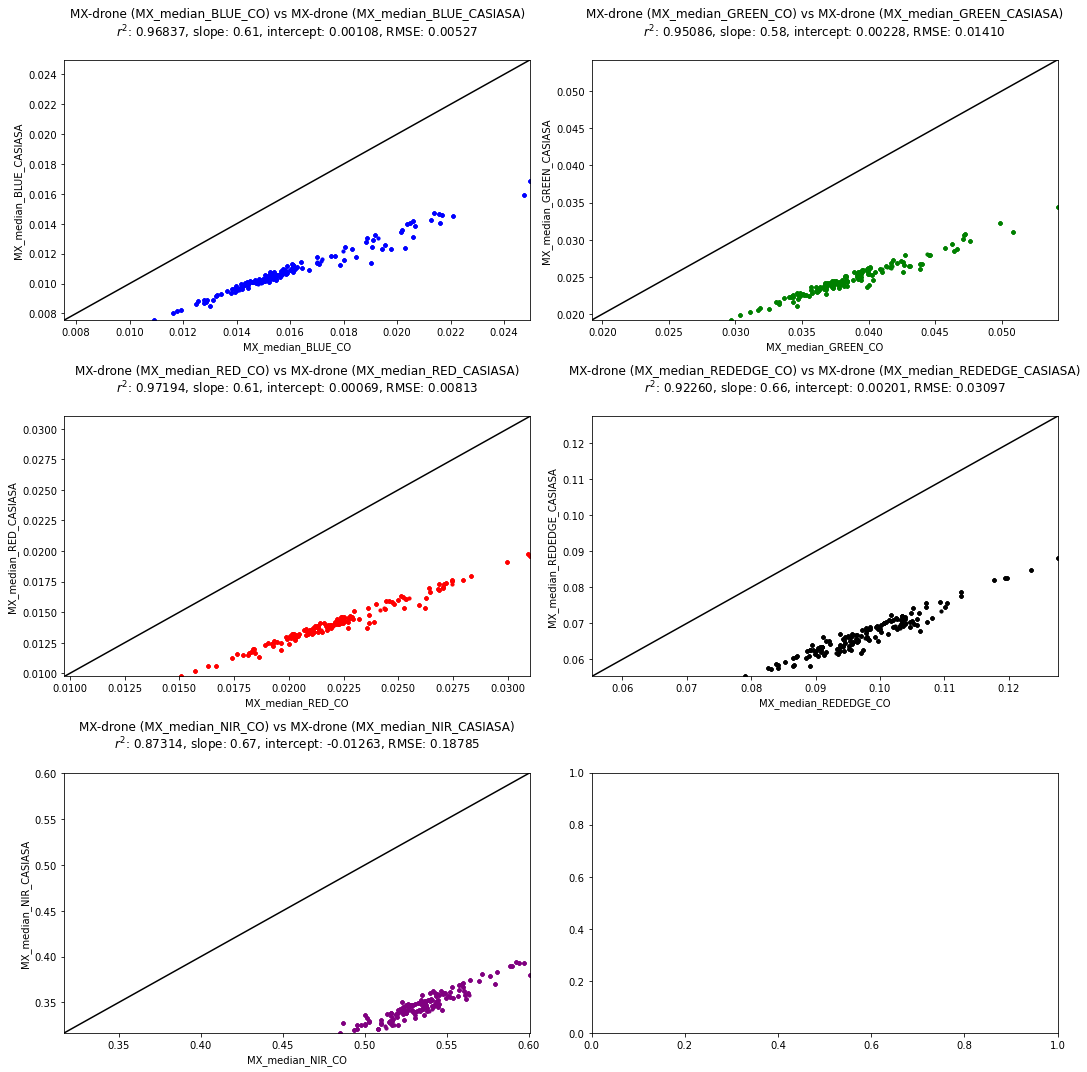

In [85]:
#Unir ambos dataframe
df_stats = pd.merge(df_cruzado_CO, df_cruzado_CASIASA, left_index=True, right_index=True, suffixes=('_CO','_CASIASA'))
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE_CO', 'MX_median_BLUE_CASIASA',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('MX_median_GREEN_CO', 'MX_median_GREEN_CASIASA',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('MX_median_RED_CO', 'MX_median_RED_CASIASA',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('MX_median_REDEDGE_CO', 'MX_median_REDEDGE_CASIASA',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('MX_median_NIR_CO', 'MX_median_NIR_CASIASA',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

#### 3. Vuelo Cruzado Camera and Solar Irradiation (CASI) VS Vuelo Cruzado Camera and Solar Irradiation and Sun Angle (CASIASA)

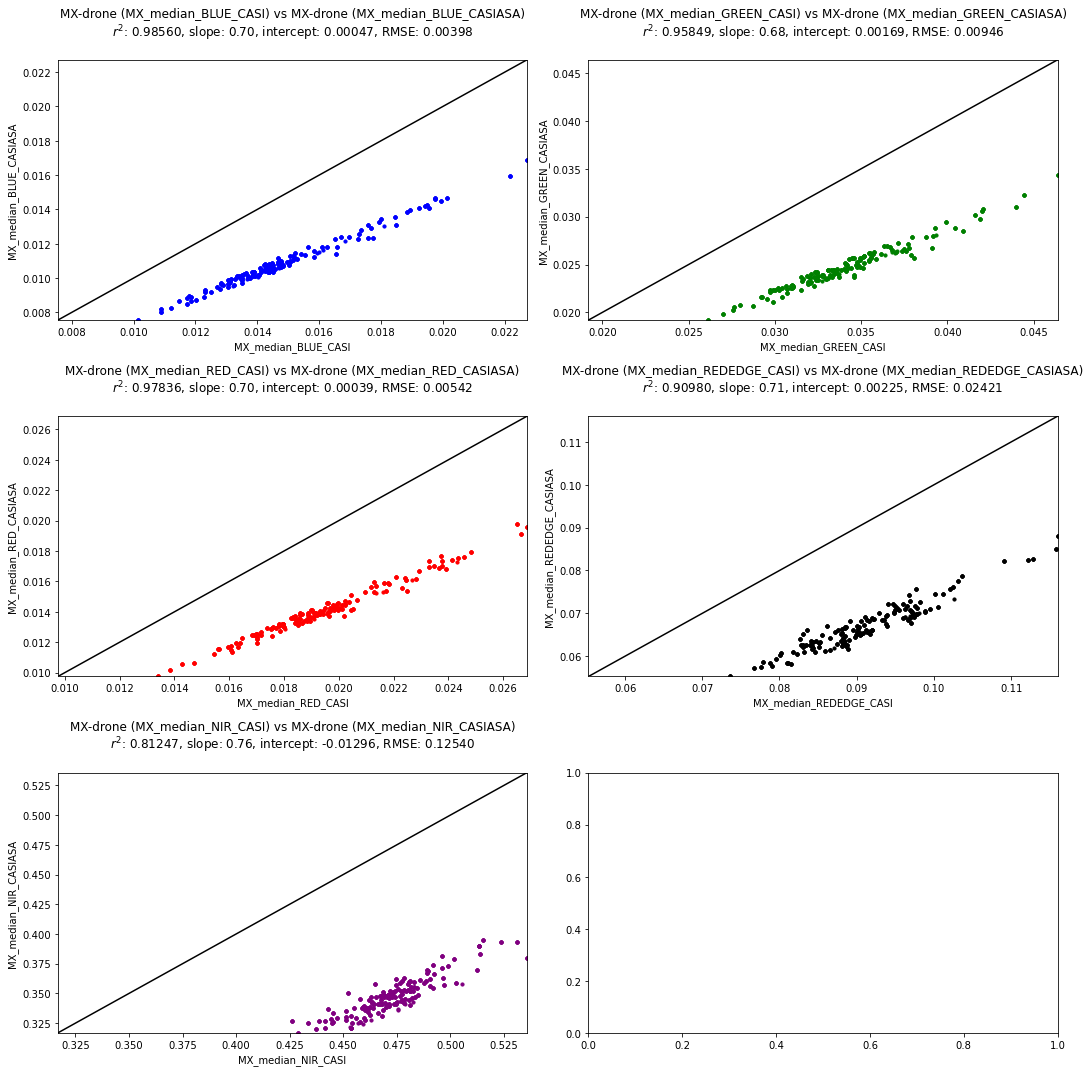

In [92]:
#Unir ambos dataframe
df_stats = pd.merge(df_cruzado_CASI, df_cruzado_CASIASA, left_index=True, right_index=True, suffixes=('_CASI','_CASIASA'))
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE_CASI', 'MX_median_BLUE_CASIASA',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('MX_median_GREEN_CASI', 'MX_median_GREEN_CASIASA',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('MX_median_RED_CASI', 'MX_median_RED_CASIASA',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('MX_median_REDEDGE_CASI', 'MX_median_REDEDGE_CASIASA',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('MX_median_NIR_CASI', 'MX_median_NIR_CASIASA',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

#### 4. Vuelo Cruzado CASI VS Vuelo Longitudinal CASI

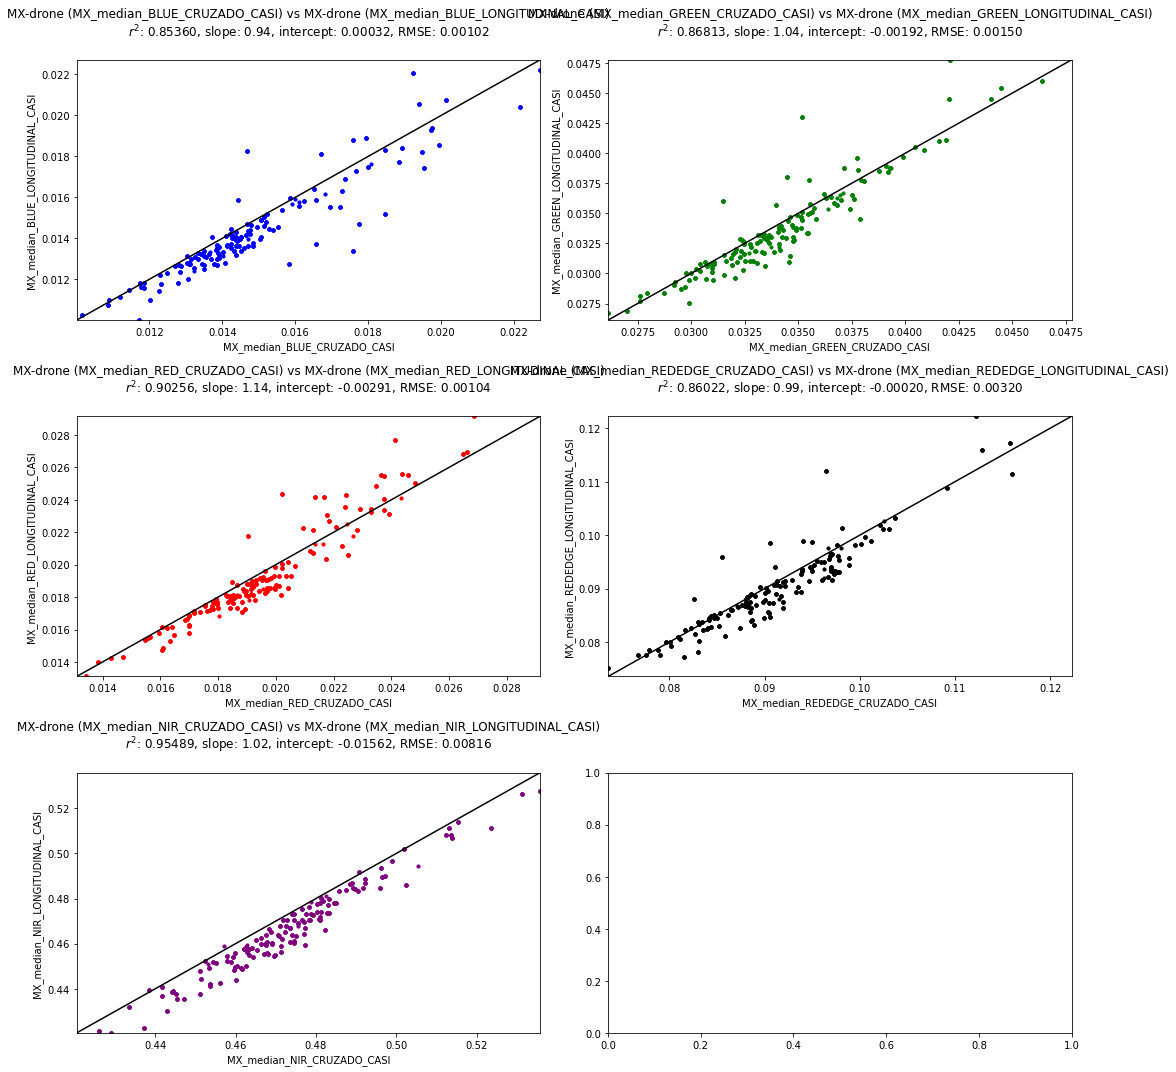

In [89]:
#Unir ambos dataframe
df_stats = pd.merge(df_cruzado_CASI, df_longitudinal_CASI, left_index=True, right_index=True, suffixes=('_CRUZADO_CASI','_LONGITUDINAL_CASI'))
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE_CRUZADO_CASI', 'MX_median_BLUE_LONGITUDINAL_CASI',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('MX_median_GREEN_CRUZADO_CASI', 'MX_median_GREEN_LONGITUDINAL_CASI',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('MX_median_RED_CRUZADO_CASI', 'MX_median_RED_LONGITUDINAL_CASI',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('MX_median_REDEDGE_CRUZADO_CASI', 'MX_median_REDEDGE_LONGITUDINAL_CASI',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('MX_median_NIR_CRUZADO_CASI', 'MX_median_NIR_LONGITUDINAL_CASI',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

#### 5. Vuelo Cruzado CASI VS Vuelo Transversal CASI

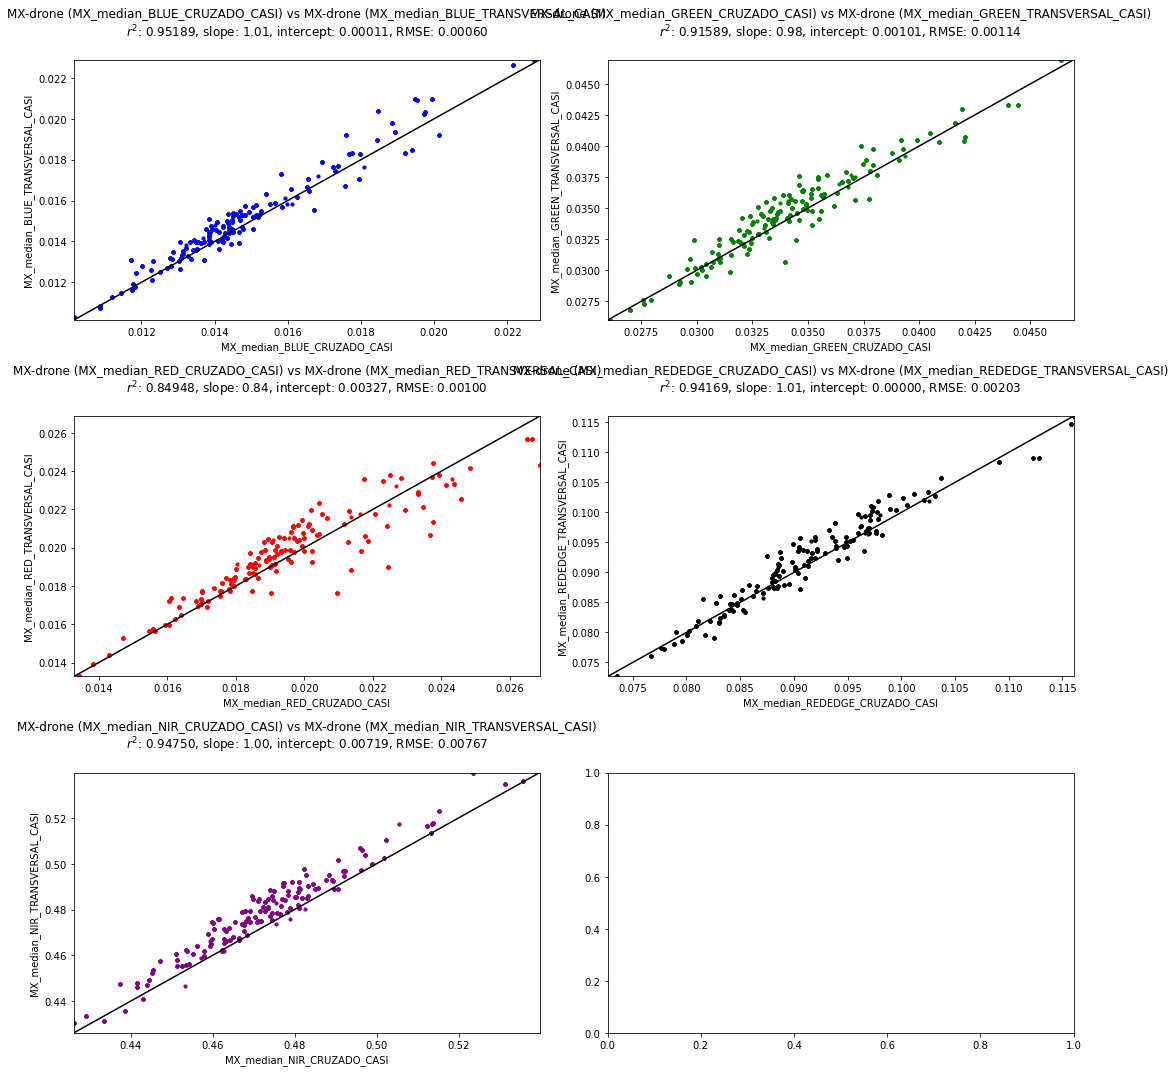

In [90]:
#Unir ambos dataframe
df_stats = pd.merge(df_cruzado_CASI, df_transversal_CASI, left_index=True, right_index=True, suffixes=('_CRUZADO_CASI','_TRANSVERSAL_CASI'))
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE_CRUZADO_CASI', 'MX_median_BLUE_TRANSVERSAL_CASI',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('MX_median_GREEN_CRUZADO_CASI', 'MX_median_GREEN_TRANSVERSAL_CASI',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('MX_median_RED_CRUZADO_CASI', 'MX_median_RED_TRANSVERSAL_CASI',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('MX_median_REDEDGE_CRUZADO_CASI', 'MX_median_REDEDGE_TRANSVERSAL_CASI',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('MX_median_NIR_CRUZADO_CASI', 'MX_median_NIR_TRANSVERSAL_CASI',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

#### 6. Vuelo Longitudinal CASI VS Vuelo Transversal CASI

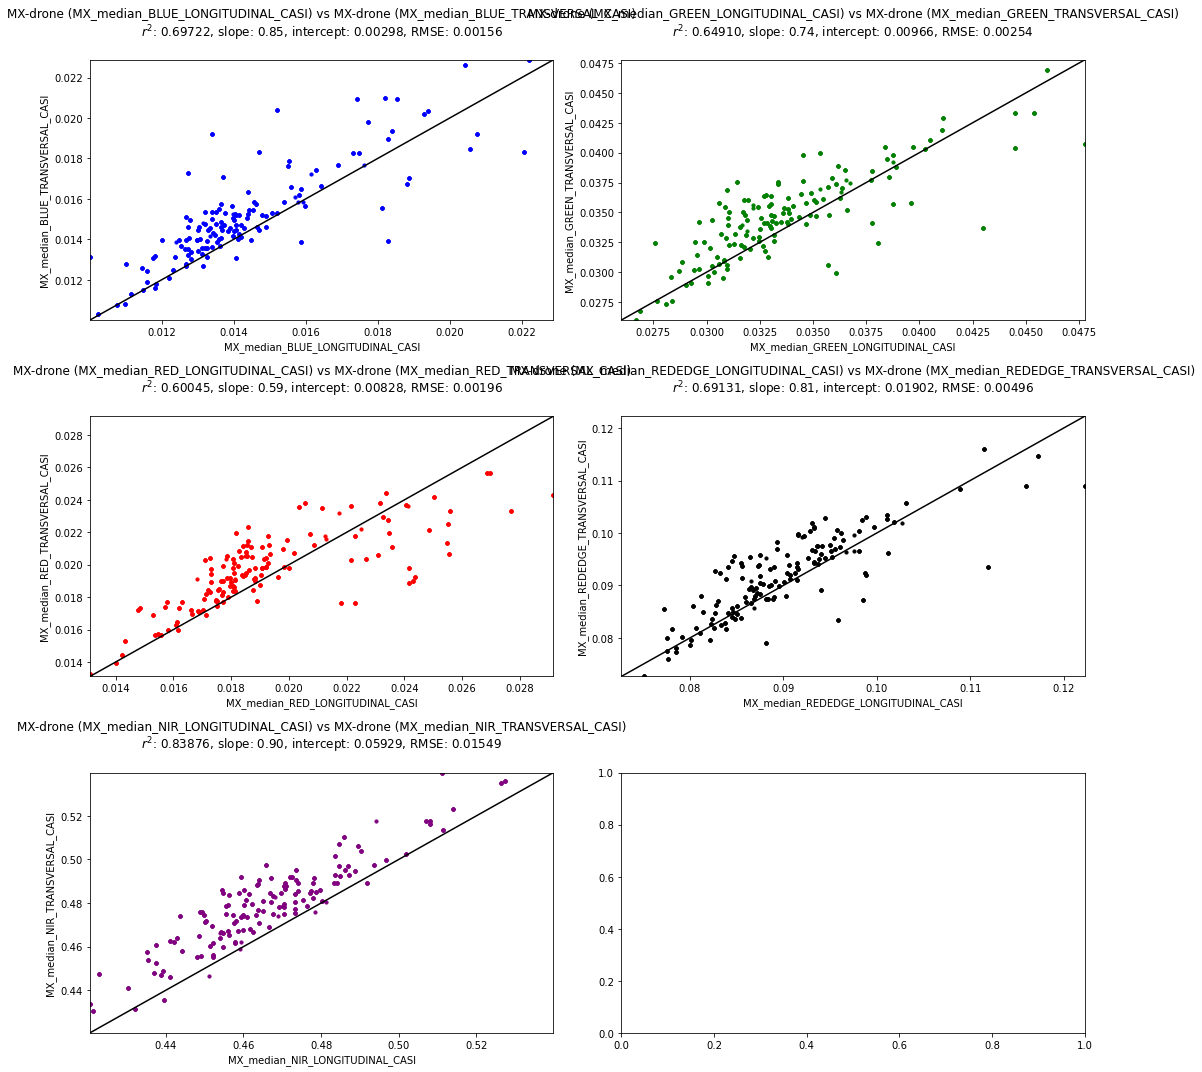

In [91]:
#Unir ambos dataframe
df_stats = pd.merge(df_longitudinal_CASI, df_transversal_CASI, left_index=True, right_index=True, suffixes=('_LONGITUDINAL_CASI','_TRANSVERSAL_CASI'))
#Plotear con la función
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE_LONGITUDINAL_CASI', 'MX_median_BLUE_TRANSVERSAL_CASI',df_stats,  ax=axarr[0][0], alpha=1, c='blue')
validation_plot('MX_median_GREEN_LONGITUDINAL_CASI', 'MX_median_GREEN_TRANSVERSAL_CASI',df_stats, ax=axarr[0][1], alpha=1, c='green')
validation_plot('MX_median_RED_LONGITUDINAL_CASI', 'MX_median_RED_TRANSVERSAL_CASI',df_stats,  ax=axarr[1][0], alpha=1, c='red')
validation_plot('MX_median_REDEDGE_LONGITUDINAL_CASI', 'MX_median_REDEDGE_TRANSVERSAL_CASI',df_stats, ax=axarr[1][1], alpha=1, c='k')
validation_plot('MX_median_NIR_LONGITUDINAL_CASI', 'MX_median_NIR_TRANSVERSAL_CASI',df_stats,  ax=axarr[2][0], alpha=1, c='purple')
fig.tight_layout()

# NO MIRAR

In [27]:
geometry_SVC.geometry = gpd.GeoSeries.from_wkt(geometry_SVC.geometry)

In [32]:
geometry_SVC.geometry

0     POLYGON ((339104.6949758487 4154093.861999711,...
1     POLYGON ((339106.18451369484 4154093.469656499...
2     POLYGON ((339107.71312926477 4154092.510686293...
3     POLYGON ((339109.2612836968 4154091.825260153,...
4     POLYGON ((339110.86805471446 4154091.081217427...
                            ...                        
88    POLYGON ((339104.171098489 4154122.905508753, ...
89    POLYGON ((339105.76350795745 4154122.216369891...
90    POLYGON ((339107.3070702711 4154121.556539322,...
91    POLYGON ((339108.87017144664 4154120.76970615,...
92    POLYGON ((339110.3160394505 4154120.1391838733...
Name: geometry, Length: 93, dtype: object

<AxesSubplot:>

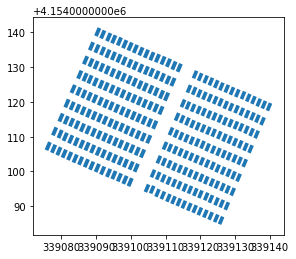

In [18]:
geometry_total.plot()

<AxesSubplot:>

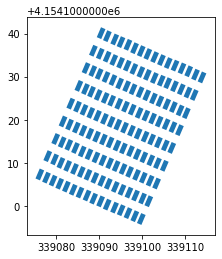

In [12]:
geometry_riego.plot()

In [11]:
geometry_secano

,id,row,column,geometry,tipo
0,9015,15,9,"POLYGON ((339118.515 4154126.577, 339117.539 4...",secano
1,8015,15,8,"POLYGON ((339116.768 4154122.463, 339115.792 4...",secano
2,9014,14,9,"POLYGON ((339119.975 4154125.872, 339118.999 4...",secano
3,9013,13,9,"POLYGON ((339121.582 4154125.206, 339120.606 4...",secano
4,9008,8,9,"POLYGON ((339129.146 4154121.847, 339128.170 4...",secano
...,...,...,...,...,...
130,1006,6,1,"POLYGON ((339118.413 4154087.908, 339117.437 4...",secano
131,1007,7,1,"POLYGON ((339116.885 4154088.496, 339115.909 4...",secano
132,1008,8,1,"POLYGON ((339115.298 4154089.181, 339114.322 4...",secano
133,1003,3,1,"POLYGON ((339122.999 4154085.891, 339122.023 4...",secano
